# How to Use Riveter — Little Red Riding Hood Demo

This Jupyter notebook will demonstrate how to use the Riveter package to measure social dynamics between personas mentioned in a collection of texts.

The package identifies and extracts the subjects, verbs, and direct objects in texts; it performs coreference resolution on the personas mentioned in the texts (e.g., clustering "Elizabeth Bennet" and "she" together as one persona); and it measures social dynamics between the personas by referencing a given lexicon. The package currently includes Maarten Sap et al's lexicon for power and agency and Rashkin et al's lexicon for perspective, effect, value, and mental state. 

Here's a demonstration of Riveter with "Little Red-Cap" by the Brothers Grimm.

![](https://www.publicdomainpictures.net/pictures/80000/nahled/little-red-riding-hood.jpg)

## Import Libraries

In [153]:
# Import Riveter
from riveter import Riveter

import os
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Demo with Power Lexicon and *Little Red Riding Hood*

## Load Text Data

Load "Little Red-Cap" by Brother Grimm

In [154]:
import requests

url = "https://github.com/melaniewalsh/Intro-Cultural-Analytics/raw/master/book/texts/literature/Grimms-Little-Red-Cap.txt"

response = requests.get(url)
text = response.text
text = text.replace("\n", " ")
text = text.replace("\r", "")

In [155]:
# Texts
texts = [text]
# Unique ids for texts
text_ids = [0]

## Load Lexicon ("Power") and Train Model

Run Riveter with NER and coreference resolution

In [156]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
              text_ids)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.39s/it]

2023-02-24 18:23:06 Complete!


Run Riveter with customized regex patterns

In [157]:
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(texts,
              text_ids,
              persona_patterns_dict={'red cap': r'^red-cap$|^little red-cap$',
                                     'the wolf': r'^wolf$|^the wolf$|^a wolf$',
                                     'huntsman': r'^huntsman$|^the huntsman$',
                                    'grandmother': r'^grandmother$|^her grandmother$|^the grandmother$',
                                     })

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.18s/it]

2023-02-24 18:23:17 Complete!


## Get Total Scores for All Documents

You can use the `.get_score_totals()` function to get cumulative power scores (or chosen dynamic scores) for each persona mentioned in the texts.

In [158]:
riveter.get_score_totals()

{'red cap': 0.36363636363636365,
 'grandmother': 0.2857142857142857,
 'the wolf': -0.1,
 'huntsman': 1.0}

## Plot Scores for All Documents

You can use the `.plot_scores()` function to display a bar plot with the top *n* or bottom *n* personas in the texts. The function will display the top 10 highest-scoring personas by default.

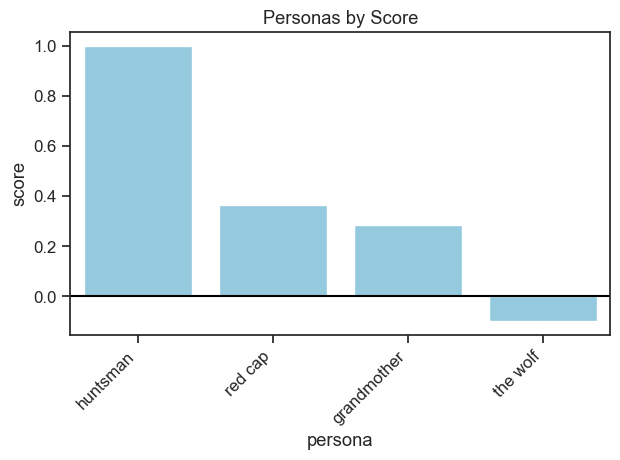

In [159]:
riveter.plot_scores()

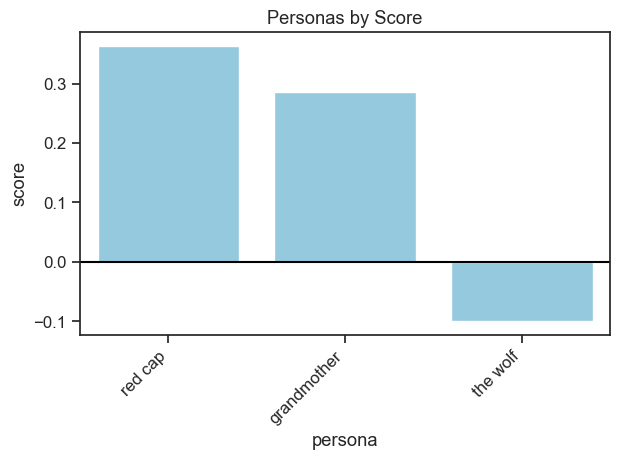

In [160]:
riveter.plot_scores(frequency_threshold=3)

## Get Scores, Subjects, and Direct Objects for Each Document

You can use the `.get_score_for_doc()` function to get power scores (or chosen dynamic scores) for each persona mentioned in a document (based on the document id passed into the training function).

In [161]:
riveter.get_scores_for_doc(0)

{'red cap': 0.36363636363636365,
 'grandmother': 0.2857142857142857,
 'the wolf': -0.1,
 'huntsman': 1.0}

You can use `.count_nsubj_for_doc()` to get all noun subjects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [162]:
riveter.count_nsubj_for_doc(0)

{('red cap', 'say'): 1,
 ('grandmother', 'live'): 1,
 ('red cap', 'enter'): 1,
 ('the wolf', 'meet'): 1,
 ('red cap', 'know'): 1,
 ('red cap', 'reply'): 1,
 ('the wolf', 'think'): 1,
 ('red cap', 'be'): 1,
 ('red cap', 'raise'): 1,
 ('the wolf', 'run'): 1,
 ('the wolf', 'lift'): 1,
 ('red cap', 'run'): 1,
 ('the wolf', 'say'): 1,
 ('the wolf', 'satisfy'): 1,
 ('huntsman', 'pass'): 1,
 ('the wolf', 'lie'): 1,
 ('the wolf', 'devour'): 1,
 ('red cap', 'fetch'): 1,
 ('huntsman', 'draw'): 1,
 ('grandmother', 'eat'): 1,
 ('red cap', 'bring'): 1,
 ('red cap', 'think'): 1}

You can use `.count_dobj_for_doc()` to get all direct objects and verb pairs (regardless of whether the verb apperas in the chosen lexicon) for each document.

In [163]:
riveter.count_dobj_for_doc(0)

{('grandmother', 'take'): 1,
 ('the wolf', 'reply'): 1,
 ('grandmother', 'call'): 1,
 ('grandmother', 'remember'): 1,
 ('grandmother', 'lie'): 1,
 ('red cap', 'swallow'): 1,
 ('grandmother', 'devour'): 1,
 ('the wolf', 'draw'): 1}

## Get Verb Polarity for Scores

We can see all the contributing verbs for each persona and whether they contributed positively or negatively to the power score.

In [ ]:
riveter.get_persona_polarity_verb_count_dict()

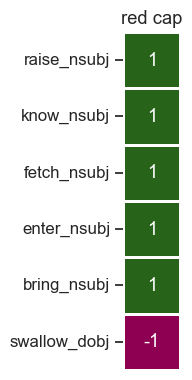

In [164]:
riveter.plot_verbs_for_persona('red cap', figsize=(2, 4), output_path= "red-cap-verbs.png")

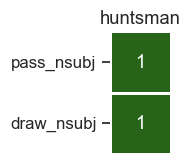

In [165]:
riveter.plot_verbs_for_persona('huntsman', figsize=(2, 4))

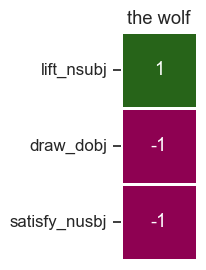

In [166]:
riveter.plot_verbs_for_persona('the wolf', figsize=(2, 4))

## Save and Load Riveter Results

Save results in .pkl file

In [167]:
riveter.save('little-red-cap.pkl')

Riveter successfully saved to "little-red-cap.pkl"


Load saved results into Riveter

In [168]:
riveter = Riveter(filename = "little-red-cap.pkl")